# 7장 군집화(Clustering)

데이터 포인트들을 별개의 군집으로 그룹화 하는 것을 의미  
유사성이 높은 데이터들을 동일한 그룹으로 분류하고 서로 다른 군집들이  
상이성을 가지도록 그룹화 합니다.



## 군집화 활용 분야

* 고객을 어떻게 세분화(Segmentation)할거냐라는 말은 고객을 쪼개겠다는 말이 아니라 특정 유형으로 분류하겠다는 말임.  
* 이미지, 영상 관련에서도 가능
* 아웃라이어를 검출하는데도 사용 가능

![](./img/Clustering1.png)

## 군집화 알고리즘

* **K-Menas** : Centroid 기반의 군집화 알고리즘임. 일반 비지니스적인 어떤 세분화나 이런 영역에서 가장 많이 활용이 되고 있는 군집화 알고리즘이다.


* **Mean Shift**  :이것 역시 Centorid 기반인데 K-Means와는 조금 다르게 Centroid가 이동하는 방식임.


* **Gaussian Mixture Model** : 데이터가 여러개의 정규분포로 구성이되어있다고 가정하고 이 데이터 세트가 어느 정규분포에 속해있는지에 따라서 클러스터링을 수행하는 것.


* **DBSCAN** : 데이터의 밀도에 따라서 군집화를 수행하는 알고리즘임



## K-Means Clustering

가장 많이 사용되고 가장 일반성도 좋고 가장 쉽게 적용할 수 있는 클러스터링 알고리즘이다.

ABCEF의 다섯개의 데이터 세트가 있다고 하자. 이 데이터세트를 2개로 군집화를 하고 싶다면

센트로이드(흑점) 두개를 만든다. 임의의 지점에 센트로이드를 만든다고 해보자.(이걸 초기화하는게 더 중요한데 설명을 위해서 임의의 지점이라고 해두자) 

데이터들이 센트로이드를 보면서 어느쪽이 더 가까운지 확인을 한다. 확인하다보면 이제 각 데이터들이 가장 가까운 중심점에 소속되게 된다.

![](./img/KmeansClustering.png)

## K-Means의 장점과 단점


### 장점

* **일반적인 군집화에서 가장 많이 활용되는 알고리즘**
* **알고리즘이 쉽고 간결함**
* **대용량 데이터에도 활용 가능**

### 단점

* **거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐.(이를 위해 PCA로 차원 축소를 적용해야 할 수 도 있다. 속성의 개수가 많을 경우 생기는 차원의 저주)**
* **반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 느려짐.**
* **이상치(Outlier)데이터에 취약하다.**

![](./img/KmeansGoodBad.png)


## 사이킷런 KMeans 클래스

n_clusers : centorid가 몇개냐는 말임.  
init='k-means++' : centroid를 놓을때 랜덤하게 놓지 않는다. 랜덤하게 놓았다가 반복횟수가 종잡을 수 도 없이 많아질수 도 있으므로 centroid를 초기화하는 알고리즘이 k-means++이다.

KMeans도 비지도 학습이다보니까 사이킷런에서도 똑같이 fit.transfrom을 가지고 호출하게 되는데 fit을하게 되면 값이 결정이 된다. labels_ 을 0,1,2 세개로 군집화를 하기로 했다면 각각의 데이터가 100개라면 100개의 데이터가 다 어느 군집에 속하는지 값을 가지게 된다.


![](./img/SklearnKMeans.png)

### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [13]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


**KMeans 객체를 생성하고 군집화 수행**

iteration의 의미는, centroid가 데이터세트들의 중심으로 이동을 하는데 그것에 변동이 없으면 멈추는걸 최대 300번까지 해보는 것이다. 그 안에 변동이 없으면 멈추고 있으면 계속 중심 이동을 함.

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

**labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid)확인하고 irisDF에 'cluster' 컬럼으로 추가**

predict는 label_ 속성만 반환한다. 그래서 아래의 값이 똑같이 나오는 것임.

In [15]:
print(kmeans.labels_)
print(kmeans.predict(irisDF))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [16]:
# 이렇게 만들어진 값을 iris 데이터에 cluster라는 값으로 할당함
irisDF['cluster']=kmeans.labels_

In [17]:
# KMeans를 하고 실제 target값과는 얼마나 차이가 있을까 찾아보는 것.
irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


0 값인 setosa는 아주 잘했다. cluster의 숫자는 임의로 매핑한 숫자라 target이 0이라고 cluster가 0이 아니라 틀린게 아님. 하나로 잘 뭉쳐놨다는 뜻임.

In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소**

아이리스 데이터 셋이 피쳐셋이 4개다보니까 시각화하기 어려워서 PCA로 차원축소를 한 다음에 시각화

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


아래 코드 두개 중 어떤걸 써도 상관없음. 

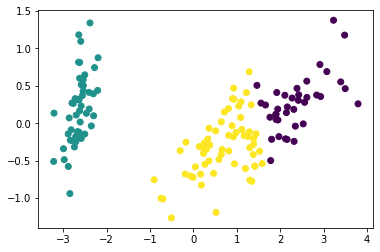

In [21]:
plt.scatter(x=irisDF.loc[:, 'pca_x'], y=irisDF.loc[:, 'pca_y'], c=irisDF['cluster']) 

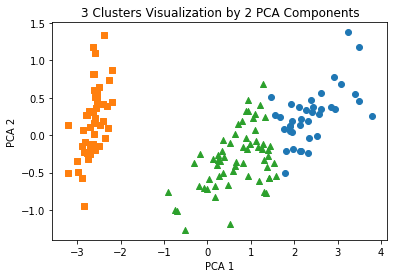

In [22]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


위의 결과를 보면 굉장히 잘 분류 되었다.

### Clustering 알고리즘 테스트를 위한 데이터 생성 

앞으로 이 데이터셋을 많이 쓸거다. 사이킷런에서는 다양한 클러스터 알고리즘을 테스트하기 위해서 make_blobs를 제공한다.

데이터의 다양한 유형, 예를 들어서 이따가 나오지만 원형으로 되어 있는 것들, 길쭉한 형태, 이런걸 centroid 기반으로 하다고 하면 

분류를 어떻게 해야할 것이냐 등 그런것들을 테스트해보기 위한 유틸리티 데이터 세트임.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# X 값은 피쳐 셋, y값은 클러스터 된 타겟 값
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


* n_samples: 생성할 총 데이터의 개수입니다. 디폴트는 100개입니다.  


* n_features: 데이터의 피처 개수입니다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처
는 y 좌표상에 표현합니다.  


* centers: int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냅니다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군
집 중심점의 좌표를 의미합니다.  


* cluster_std: 생성될 군집 데이터의 표준 편차를 의미합니다. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이
터가 표준편차 0.8을 가진 값으로 만들어집니다.   
[0.8, 1,2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내
데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듭
니다.   
군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용합니다  

<b>이제 이렇게 만들어진 것을 시각화를 해볼 것임.</b>

In [24]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])

# 타겟값은 할당된 centroid를 의미를 함.
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


**make_blob()으로 만들어진 데이터 포인트들을 시각화**

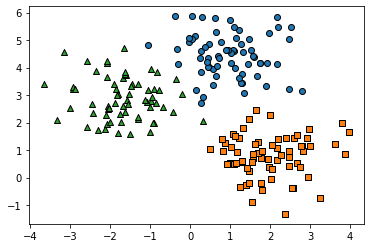

In [25]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

아래처럼 간단하게 해도 된다.

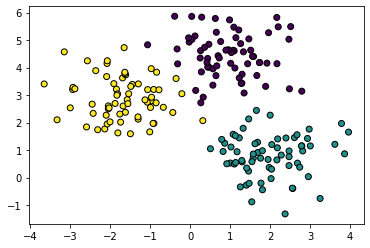

In [26]:
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y )

**K-Means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화**

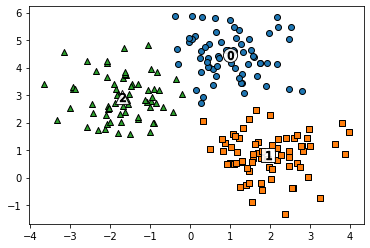

In [27]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [28]:
kmeans.cluster_centers_

array([[ 0.990103  ,  4.44666506],
       [ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224]])

In [29]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64
